In [125]:
import networkx as nx
import json
import joblib
import gzip
from matplotlib import pyplot as plt
import os

In [21]:
%matplotlib inline

In [12]:
train_data = []
filename = "/Users/petrovao/Downloads/py150_files/20_dir/graph-dataset-split/train/graph-000.jsonl.gz"

with gzip.open(filename, "rb") as file:
    for line in file.readlines():
        train_data.append(json.loads(line))
    


In [14]:
train_data[0].keys()

dict_keys(['nodes', 'edges', 'token-sequence', 'supernodes', 'filename'])

The graphs contain the following edges:
* `CHILD` &ndash; AST edges
* `NEXT` &ndash; edges connecting subsequent tokens in code
* `NEXT_USE` &ndash; next usage of a variable
* `LAST_LEXICAL_USE` &ndash; previous usage of a variable
* `OCCURRENCES_OF` &ndash; edges between occurrences of the same variable 
* `SUBTOKEN_OF` &ndash; edges from subtokens to their origin
* `COMPUTED_FROM` &ndash; edges that point to the origins of a variable
* `RETURNS_TO` &ndash; edges from return/yield statements to the function definition

In [54]:
list(train_data[0]["edges"].keys())

['CHILD',
 'NEXT',
 'LAST_LEXICAL_USE',
 'NEXT_USE',
 'COMPUTED_FROM',
 'RETURNS_TO',
 'OCCURRENCE_OF',
 'SUBTOKEN_OF']

In [36]:
nx.spring_layout?

In [48]:
G=nx.DiGraph()
# Add nodes and edges
G.add_nodes_from([(i, {"label": label}) for i, label in enumerate(train_data[0]["nodes"])],data=True)

edges = []
for relationship, connections in train_data[0]["edges"].items():
    for parent, children in connections.items():
        edges += [(int(parent), child) for child in children]

G.add_edges_from(edges)

/Users/petrovao/miniconda3/envs/py3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/petrovao/miniconda3/envs/py3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


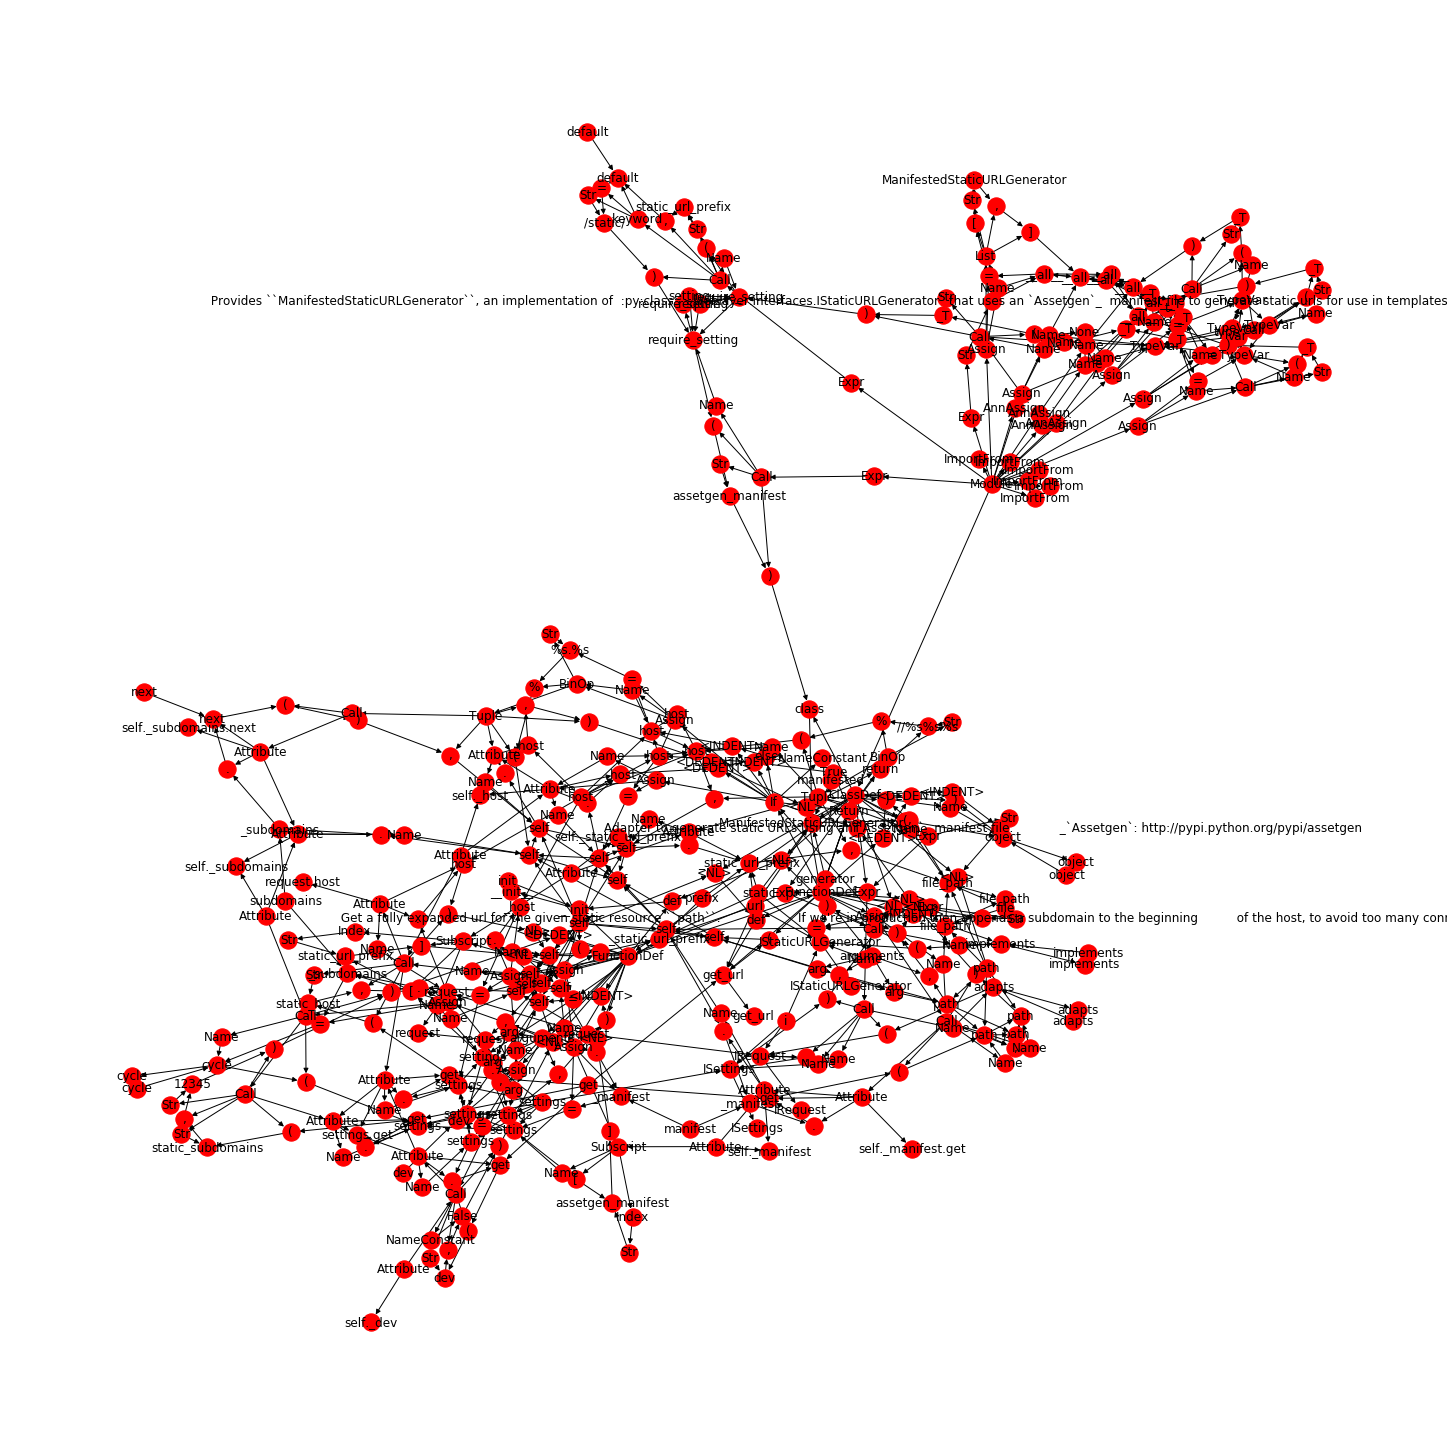

In [150]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(nx.Graph(G), iterations=100)
labels = nx.get_node_attributes(G, "label")
nx.draw(
    G, 
    with_labels=True, 
    labels=labels, 
    pos=pos
)
plt.savefig("ast.png")

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [76]:
train_data[0]["token-sequence"]

[3,
 6,
 9,
 10,
 12,
 13,
 14,
 23,
 27,
 30,
 32,
 34,
 36,
 37,
 40,
 43,
 45,
 47,
 48,
 50,
 51,
 54,
 57,
 59,
 61,
 62,
 64,
 65,
 68,
 71,
 73,
 75,
 76,
 78,
 79,
 83,
 85,
 87,
 88,
 90,
 91,
 93,
 94,
 98,
 99,
 101,
 102,
 104,
 105,
 106,
 108,
 110,
 111,
 114,
 115,
 119,
 121,
 123,
 125,
 127,
 129,
 130,
 134,
 136,
 138,
 140,
 141,
 143,
 144,
 146,
 149,
 151,
 153,
 155,
 157,
 159,
 160,
 161,
 164,
 165,
 166,
 170,
 173,
 174,
 175,
 177,
 179,
 180,
 182,
 183,
 184,
 187,
 188,
 189,
 193,
 196,
 197,
 198,
 199,
 201,
 202,
 205,
 206,
 207,
 209,
 210,
 213,
 214,
 215,
 219,
 221,
 222,
 225,
 226,
 227,
 230,
 231,
 232,
 236,
 238,
 239,
 242,
 243,
 244,
 247,
 248,
 249,
 253,
 255,
 257,
 261,
 262,
 263,
 264,
 266,
 267,
 269,
 270,
 271,
 272,
 273,
 275,
 276,
 278,
 281,
 283,
 285,
 287,
 288,
 289,
 292,
 293,
 296,
 299,
 303,
 304,
 305,
 306,
 307,
 309,
 311,
 312,
 314,
 315,
 316,
 318,
 320,
 321,
 324,
 327,
 329,
 330,
 331,
 332,
 333

In [77]:
train_data[0]

{'nodes': ['Module',
  'Expr',
  'Str',
  ' Provides ``ManifestedStaticURLGenerator``, an implementation of  :py:class:`~weblayer.interfaces.IStaticURLGenerator` that uses an `Assetgen`_  manifest file to generate static urls for use in templates.    _`Assetgen`: http://pypi.python.org/pypi/assetgen  ',
  'Assign',
  'Name',
  '__all__',
  '__all__',
  'List',
  '=',
  '[',
  'Str',
  'ManifestedStaticURLGenerator',
  ',',
  ']',
  'ImportFrom',
  'ImportFrom',
  'ImportFrom',
  'ImportFrom',
  'ImportFrom',
  'ImportFrom',
  'AnnAssign',
  'Name',
  '__all__',
  'None',
  'Assign',
  'Name',
  '_T',
  '_T',
  'Call',
  '=',
  'Name',
  'TypeVar',
  'TypeVar',
  '(',
  'Str',
  '_T',
  ')',
  'AnnAssign',
  'Name',
  '__all__',
  'Assign',
  'Name',
  '_T',
  'Call',
  '=',
  'Name',
  'TypeVar',
  '(',
  'Str',
  '_T',
  ')',
  'AnnAssign',
  'Name',
  '__all__',
  'Assign',
  'Name',
  '_T',
  'Call',
  '=',
  'Name',
  'TypeVar',
  '(',
  'Str',
  '_T',
  ')',
  'AnnAssign',
  'Name

In [143]:
from flake8.api import legacy as flake8
from pathlib import Path
import os

style_guide = flake8.get_style_guide(
    select=[
        "W403", "W804", "W806", "W802", "W806", "F812", "F822", "F823", "E741"],
format='pylint')
report = style_guide.check_files(
    glob("/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/*/*/*.py")
)

In [144]:
report.get_statistics("W403")

[]

In [145]:

style_guide = flake8.get_style_guide(
    select=["F402", "F823", "F841", "F821", "F822", "F812", "F822", "F823"],
format='pylint')
report = style_guide.check_files(
    glob("/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/*/*/*.py")
)


/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/0k/shyaml/shyaml.py:364: [F821] undefined name 'exit'
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/0rpc/zerorpc-python/setup.py:48: [F821] undefined name '__version__'
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/0rpc/zerorpc-python/setup.py:50: [F821] undefined name '__author__'
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/00/wikihouse/asset.py:64: [F841] local variable 'unused' is assigned to but never used
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/2Gears/gearbox-sublime-sencha/class_functions.py:126: [F841] local variable 'view' is assigned to but never used
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/2Gears/gearbox-sublime-sencha/class_functions.py:165: [F841] local variable 'curClass' is assigned to but never used
/Users/petrovao/Downloads/py150_files/20_dir/raw_repos/2Gears/gearbox-sublime-sencha/class_functions.py:180: [F841] local variable 'curGroup' is assigned to but n

In [149]:
report